# Mosquitos in Chicago - EDA

### Created By: Drewe MacIver
#### December 5th, 2023

# Part 1 - Basic Data Wrangling

1. What is the shape of the dataframe?

2. Convert the 'Date' column to have a datetime format.

3. Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

4. Are there any columns that contain duplicate information? If so, remove the redundant columns.

5. Are there any null values in the dataframe? If so, deal with them appropriately

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('mosquito_data.csv') # read in the CSV as a Pandas dataframe.
data

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758


### 1. What is the shape of the dataframe?

In [3]:
data.shape # The dataframe is 18495 rows, and 13 columns

(18495, 13)

In [4]:
data.info() # The "Date" column is currently a string / object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


### 2. Convert the 'Date' column to have a datetime format.

In [25]:
data["Date"] = pd.to_datetime(data["Date"]) # convert the "Date" column to datetime.
data.info() #show

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


### 3. Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

3.1 - Distribution of Years (numerical column) 

3.2 - Distribution of Block (numerical column)

3.3 - Trap type (categorical column)

3.4 - Species (categorical column)


### 3.1 - Distribution of Years (numerical column)

The "Years" column is storing int64 data indicating the Year that the WNV test is performed.

The data is spread relatively uniformly across the 13 Years, where the year with the most (and least) numerous tests accounting for 11.5% (and 5.3%) of all tests performed, respectively.

In [6]:
data["Year"].map(type).value_counts() # data type of column "Year"

Year
<class 'int'>    18495
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

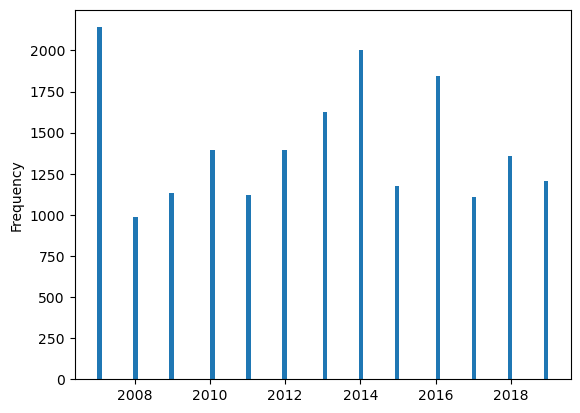

In [7]:
# 3.1 - Distribution of Years
data["Year"].plot(kind="hist",bins=100) # histogram of "Year" using .plot

In [8]:
# 3.1 - Distribution of Years
data["Year"].value_counts(normalize=True) #distribution of "Year" (proportionally)

Year
2007    0.115761
2014    0.108137
2016    0.099703
2013    0.087808
2010    0.075534
2012    0.075264
2018    0.073587
2019    0.065369
2015    0.063693
2009    0.061368
2011    0.060557
2017    0.060016
2008    0.053204
Name: proportion, dtype: float64

### 3.2 - Distribution of Block (numerical column)

The "Blocks" column is storing int data indicating the Block number of the address where the mosquito trap was collected.

The data is distributed unevenly, with 12% of all values occuring in the "100" block, and 50% of all values occurring in just 14 of the 87 Blocks

In [9]:
data["Block"].map(type).value_counts() # data type of column "Block"

Block
<class 'int'>    18495
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

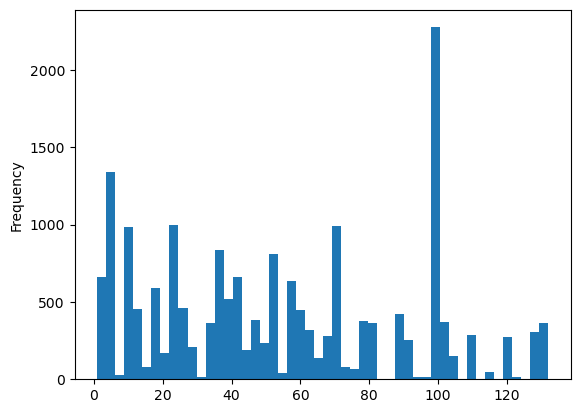

In [10]:
# 3.2 - Distribution of Blocks
data["Block"].plot(kind="hist",bins=50)

In [11]:
# 3.2 - Distribution of Blocks
data["Block"].value_counts(normalize=True) #Distribution of "Block" column (proportionally)

Block
100    0.122466
22     0.038659
58     0.034388
70     0.034009
52     0.031198
         ...   
80     0.000270
29     0.000108
112    0.000108
88     0.000108
54     0.000054
Name: proportion, Length: 87, dtype: float64

### 3.3 - Distribution of Trap type (categorical column)

The "Trap type" column is storing _____ data indicating the one of four mosquito traps identified in the Dataset.  95.9% of Traps are GRAVID traps.  

<Axes: ylabel='Trap type'>

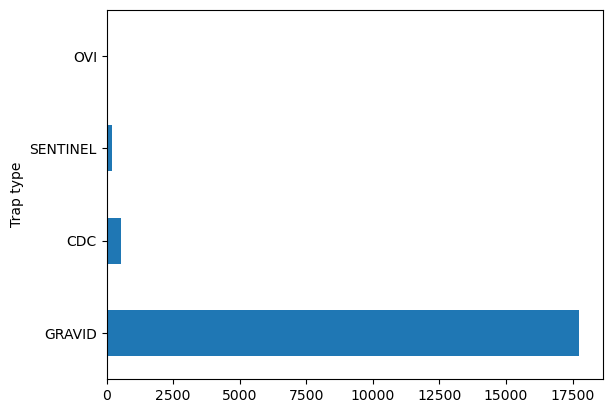

In [12]:
# 3.3 - Distribution of Trap type
data["Trap type"].value_counts().plot(kind='barh') # Bar graph of "Trap type" .plot

In [13]:
data["Trap type"].map(type) # data type of column "Trap type"

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
18490    <class 'str'>
18491    <class 'str'>
18492    <class 'str'>
18493    <class 'str'>
18494    <class 'str'>
Name: Trap type, Length: 18495, dtype: object

In [14]:
# 3.3 - Distribution of Trap type
data["Trap type"].value_counts(normalize=True) # values of column "Species" (proportinally)

Trap type
GRAVID      0.959232
CDC         0.029413
SENTINEL    0.011300
OVI         0.000054
Name: proportion, dtype: float64



### 3.4 - Distribution of Mosquito species (categorical column)

The "Mosquite Species" column is storing string data indicating the one of four mosquito types identified in the Dataset.  Culex Restuans make up 64% of the dataset, while Culex Pipiens make up 29% of the dataset.

<Axes: ylabel='Species'>

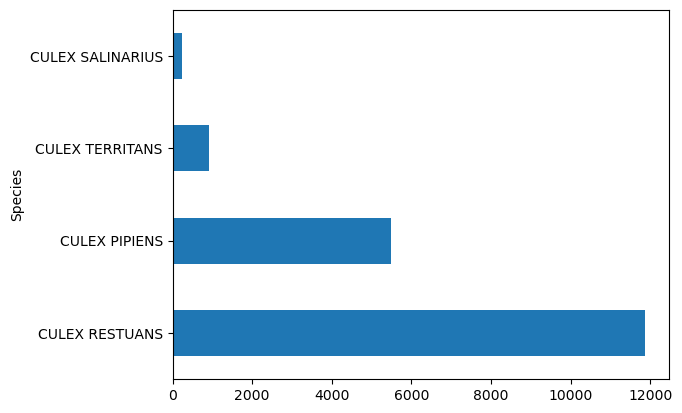

In [15]:
# 3.4 Distribution of Mosquito Species
data["Species"].value_counts().plot(kind='barh')

In [26]:
data["Species"].map(type).value_counts() # data type of column "Species"

Species
<class 'str'>    18495
Name: count, dtype: int64

In [27]:
# 3.4 Distribution of Mosquito Species
data["Species"].value_counts(normalize=True) # Data column "Species" values (proportionally)

Species
CULEX RESTUANS      0.641579
CULEX PIPIENS       0.296621
CULEX TERRITANS     0.049581
CULEX SALINARIUS    0.012220
Name: proportion, dtype: float64

### 4. Are there any columns that contain duplicate information? If so, remove the redundant columns.

Duplicate Information:
- Mosquito ID (already in the "species" column)

Note, even though the "Date" column contains the information for the "Year" and the "Week", I've opted not to drop the "Year" and the "Week" columns as I may use these columns in later analysis and do not want to parse the "Date" column later to do so. 

In [29]:
data1 = data.drop(columns="Mosquito ID") #Drop the Mosquito ID Column
data1 # I'll use the data1 table from now on (rather than do an inplace=True data drop)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758


### 5. Are there any null values in the dataframe? If so, deal with them appropriately.

In [ ]:
data1.isna().sum() # are there any nulls in the dataset?  If so, how many?

In [ ]:
data1.info()  # Lat and Lon are float64 data.

In [ ]:
data1["Lat"].sort_values(ascending=False).head(5) # max Lat values

In [ ]:
data1["Lat"].sort_values(ascending=True).head(5) # min Lat values

In [ ]:
data1["Lon"].sort_values(ascending=False).head(5) # max Lon values

In [ ]:
data1["Lon"].sort_values(ascending=True).head(5)  # min Lon values

In [30]:
# I'm adding a column that indicates which lat and lon had null values, and which ones didn't
# we can use this later to possibly filter out which Lat and Lon rows were previously null 

data1['lat_null'] = data1['Lat'].isnull()
data1['lon_null'] = data1['Lon'].isnull()
data1

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,lat_null,lon_null
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN,True,True
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,False,False
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,False,False
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,False,False
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,False,False
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,False,False
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,False,False
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,False,False


**Replacing the Lat and Lon null values is done in the following two cells:**

In [31]:
# replace the null "Lat" values with the mean of the non-null values

select_na = data1["Lat"].isna()
data1.loc[select_na,"Lat"] = np.nanmean(data1["Lat"])
data1

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,lat_null,lon_null
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.839963,NaN,True,True
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,False,False
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,False,False
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,False,False
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,False,False
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,False,False
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,False,False
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,False,False


In [32]:
# replace the null "Lon" values with the mean of the non-null values

select_na = data1["Lon"].isna()
data1.loc[select_na,"Lon"] = np.nanmean(data1["Lon"])
data1

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,lat_null,lon_null
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.839963,-87.691642,True,True
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,False,False
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,False,False
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,False,False
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,False,False
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,False,False
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,False,False
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,False,False


# Part 2: Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

### Below are *three* visuals that explore the relationship between Mosquito Number and Date.

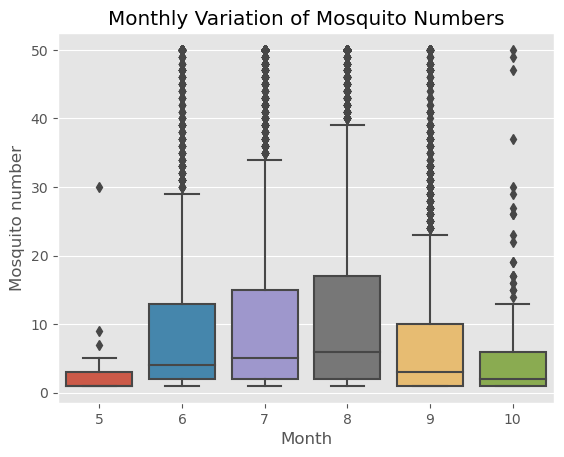

In [33]:
# Boxplot of Mosquito Number and Date
# I found this boxplot by using ChatGPT, and am adapting it to fit my dataframe.

data1['Month'] = data1['Date'].dt.month # Date axis = date month
sns.boxplot(x='Month', y='Mosquito number', data=data1) 
plt.title('Monthly Variation of Mosquito Numbers')
plt.show()


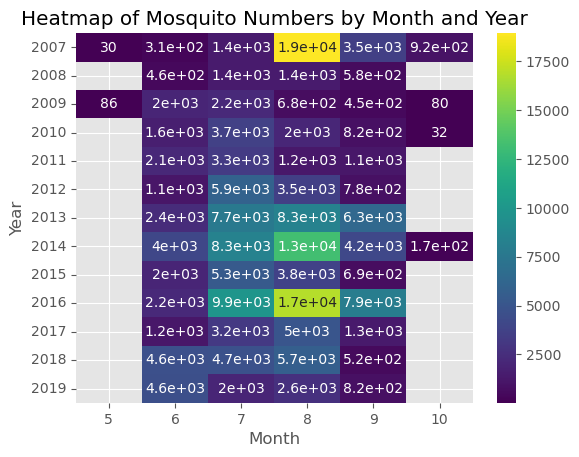

In [34]:
# Heatmap of Mosquito Number and Date
# I found this heatmap by using ChatGPT, and am adapting it to fit my dataframe.

pivoted_data = data1.pivot_table(index=data1['Date'].dt.year, columns=data1['Date'].dt.month, values='Mosquito number', aggfunc='sum') # x axis Year, y axis month, values are the sum of mosquitos for that time period (month and year)
sns.heatmap(pivoted_data, annot=True, cmap='viridis')  # Pivoted data, with text, colorscheme 'viridis'
plt.title('Heatmap of Mosquito Numbers by Month and Year')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()


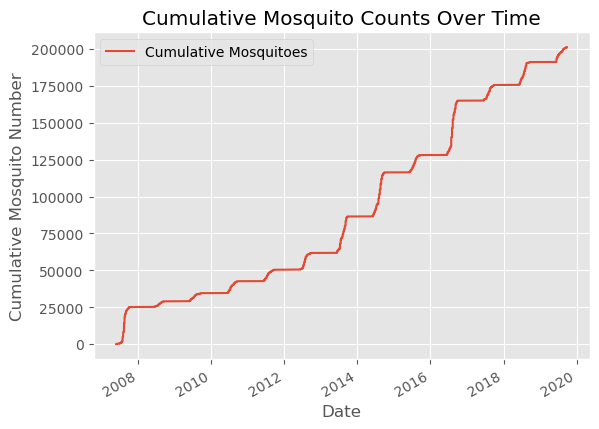

In [35]:
# Cumulative Plot of Mosquito Number and Date
# I found this Cumulative Plot by using ChatGPT, and am adapting it to fit my dataframe.

data1.sort_values('Date', inplace=True) # sorting the values in the Date column
data1['Cumulative Mosquitoes'] = data1['Mosquito number'].cumsum() # Turning Mosquito # into a cumulative sum (as dates increase, the Mosquito Number rises)
data1.plot(x='Date', y='Cumulative Mosquitoes')
plt.title('Cumulative Mosquito Counts Over Time')
plt.ylabel('Cumulative Mosquito Number')
plt.show()


## **Part 3 - Advanced EDA**

1. Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

2. Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.

3. Using an appropriate visual, come up with an additional insight of your choice.

**1. Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.**

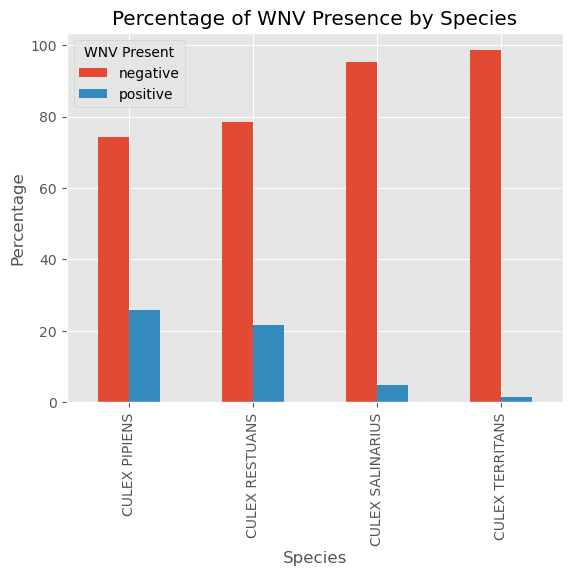

In [45]:
#1 The relationship between mosquito species and WNV prevalence
# I found this Cumulative Plot by using ChatGPT, and am adapting it to fit my dataframe.

grouped_percentage = data1.groupby('Species')['WNV Present'].value_counts(normalize=True).unstack() * 100 #Group by species, x-axis species, hue is WNV Present, normalize=True to make the counts a percentage of their in-group total, unstack puts them side-by-side, * 100 turns the normalize=True/1 into a percentage.
grouped_percentage.plot(kind='bar')
plt.title('Percentage of WNV Presence by Species')
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.show()


**2. Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.**

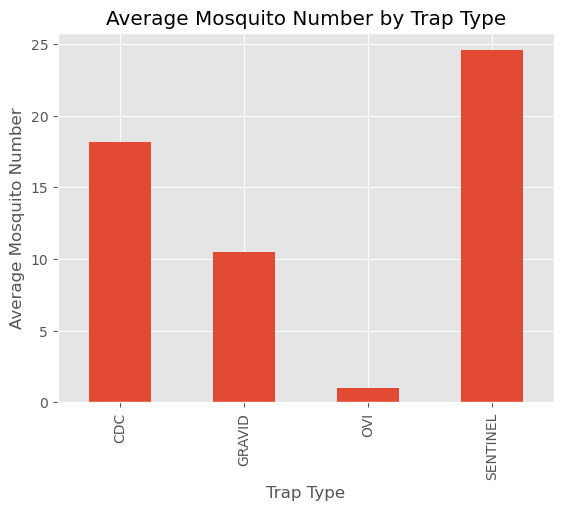

In [50]:
#2 The relationship between the number of mosquitos caught and trap type.
# I found this Cumulative Plot by using ChatGPT, and am adapting it to fit my dataframe.

data1.groupby('Trap type')['Mosquito number'].mean().plot(kind='bar') # group by 'Trap type', with the 'Mosquito number' on the y-axis, and make the bar graph the .mean of mosquito number 
plt.title('Average Mosquito Number by Trap Type')
plt.xlabel('Trap Type')
plt.ylabel('Average Mosquito Number')
plt.show()


**#3 Using an appropriate visual come up with an additional insight of your choice**

Insight:  Mosquito activity is not equally as strong throughout the season, with Culex Restauns numbers peaking earlier in the season, and Culex Pipiens peaking later in the season. 

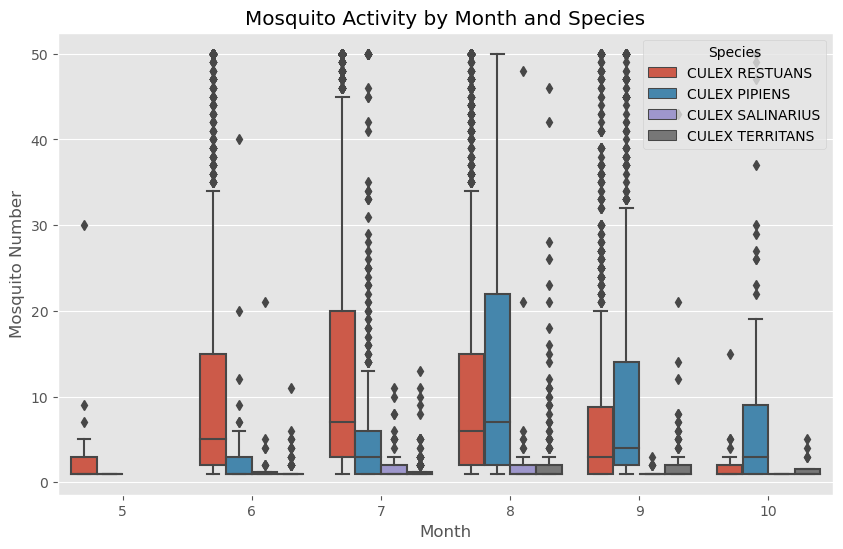

In [62]:
#3 Come up with an additional insight of your choice.
# I found this Cumulative Plot by using ChatGPT, and am adapting it to fit my dataframe.

data1['Month'] = data1['Date'].dt.month  # limiting the dataframe to "Month" data.
plt.figure(figsize=(10, 6)) # fitting the graph to be the most appropriate size
sns.boxplot(x='Month', y='Mosquito number', hue='Species', data=data1) # Seaborn boxplot, color coded by 'Species'
plt.title('Mosquito Activity by Month and Species')
plt.xlabel('Month')
plt.ylabel('Mosquito Number')
plt.legend(title='Species', loc='upper right')
plt.show()

